<a href="https://colab.research.google.com/github/satani99/bird_classifier/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
!pip install -q kaggle-cli

  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-smjqktbc/lxml_891ee040b004482abcb95ec1c23246c0/setup.py'"'"'; __file__='"'"'/tmp/pip-install-smjqktbc/lxml_891ee040b004482abcb95ec1c23246c0/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-6noalb4k/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/lxml Check the logs for full command output.


In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'nikhilsatani'
os.environ['KAGGLE_KEY'] = 'XXX'

In [3]:
%%bash
mkdir /content/data
cd /content/data
kaggle datasets download -d gpiosenka/100-bird-species --unzip

mkdir: cannot create directory ‘/content/data’: File exists
100%|██████████| 1.49G/1.49G [00:06<00:00, 267MB/s]


In [4]:
from fastai.vision.all import *
import pandas as pd

In [5]:
bird_name = pd.read_csv('/content/data/birds.csv')

In [6]:
bird_name.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [7]:
bird_l_name = pd.read_csv('/content/data/birds latin names.csv')
bird_l_name.head()

,class_index,class,SCIENTIFIC NAME
0,0,ABBOTTS BABBLER,Malacocincla abbotti
1,1,ABBOTTS BOOBY,Papasula abbotti
2,2,ABYSSINIAN GROUND HORNBILL,Bucorvus abyssinicus
3,3,AFRICAN CROWNED CRANE,Balearica regulorum
4,4,AFRICAN EMERALD CUCKOO,Chrysococcyx cupreus


In [8]:
c = bird_l_name['class']
print(c)
print(type(c))


0                  ABBOTTS BABBLER
1                    ABBOTTS BOOBY
2       ABYSSINIAN GROUND HORNBILL
3            AFRICAN CROWNED CRANE
4           AFRICAN EMERALD CUCKOO
                  ...             
395       WILSONS BIRD OF PARADISE
396                      WOOD DUCK
397    YELLOW BELLIED FLOWERPECKER
398                 YELLOW CACIQUE
399        YELLOW HEADED BLACKBIRD
Name: class, Length: 400, dtype: object
<class 'pandas.core.series.Series'>


In [9]:
path = Path('/content/data/train')

In [10]:
fns = get_image_files(path)
fns

(#58388) [Path('/content/data/train/GROVED BILLED ANI/051.jpg'),Path('/content/data/train/GROVED BILLED ANI/017.jpg'),Path('/content/data/train/GROVED BILLED ANI/068.jpg'),Path('/content/data/train/GROVED BILLED ANI/026.jpg'),Path('/content/data/train/GROVED BILLED ANI/113.jpg'),Path('/content/data/train/GROVED BILLED ANI/050.jpg'),Path('/content/data/train/GROVED BILLED ANI/097.jpg'),Path('/content/data/train/GROVED BILLED ANI/025.jpg'),Path('/content/data/train/GROVED BILLED ANI/053.jpg'),Path('/content/data/train/GROVED BILLED ANI/106.jpg')...]

In [11]:
class DataLoaders(GetAttr):
  def __init__(self, *loaders): self.loaders = loaders
  def __getitem__(self, i): return self.loaders[i]
  train, valid = add_props(lambda i,self: self[i])

In [12]:
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label
)

In [13]:
dls = birds.dataloaders(path)

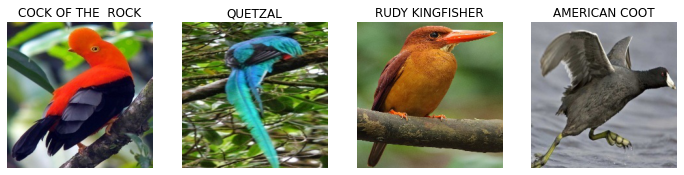

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.448118,0.816874,0.201507,02:23


epoch,train_loss,valid_loss,error_rate,time
0,0.748764,0.481782,0.120065,02:48
1,0.466265,0.355558,0.093603,02:46
2,0.198031,0.281311,0.068425,02:44
3,0.080822,0.265211,0.063201,02:45


In [16]:
learn.export()

In [17]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [18]:
from google.colab import files
files.download('export.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
learn.predict('/content/data/test/AFRICAN OYSTER CATCHER/1.jpg')

('AFRICAN OYSTER CATCHER',
 TensorBase(6),
 TensorBase([5.2066e-11, 4.8494e-10, 1.2263e-10, 7.7417e-11, 1.0325e-11,
             2.0939e-10, 9.9731e-01, 2.2079e-09, 1.7728e-09, 5.0378e-11,
             3.3200e-06, 5.3701e-10, 2.2943e-11, 1.0316e-11, 8.7067e-09,
             2.0931e-11, 7.7998e-11, 1.7978e-08, 1.2754e-09, 1.2477e-09,
             1.2835e-10, 8.8420e-09, 1.6574e-10, 6.8942e-12, 7.7491e-12,
             2.4315e-08, 2.7153e-11, 3.7401e-11, 5.8197e-12, 1.0875e-11,
             2.5302e-12, 4.3968e-09, 2.1600e-08, 2.1081e-08, 3.2061e-11,
             4.5368e-12, 2.6072e-13, 6.8966e-11, 1.7541e-10, 3.9559e-06,
             6.4036e-14, 3.7857e-10, 3.7468e-12, 9.4281e-10, 1.6883e-12,
             1.3350e-09, 7.2701e-08, 9.2159e-09, 7.5863e-11, 2.9233e-10,
             2.3523e-10, 8.0825e-08, 5.4758e-13, 4.4063e-10, 8.9014e-12,
             3.1368e-10, 4.6140e-11, 6.7661e-13, 2.1985e-11, 2.4757e-11,
             3.3046e-10, 2.1794e-10, 2.6195e-07, 1.5955e-09, 2.2333e-07,
        

In [21]:
learn.dls.vocab

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA', 'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BARROWS GOLDENEYE', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIR